In [1]:
%%bash

# When running from inside this repo:
# cd ../..
# python setup.py install
# or
# pip install --prefix .

# When running independently
# pip install -U git+https://github.com/neomatrix369/nlp_profiler.git

pip install nlp_profiler
echo "Once successfully installed, please RESTART your Jupyter kernels or Colab runtimes for the changes to take effect"

Once successfully installed, please RESTART your Jupyter kernels or Colab runtimes for the changes to take effect


ERROR: You must give at least one requirement to install (see "pip help install")
You should consider upgrading via the '/usr/local/bin/python3.7 -m pip install --upgrade pip' command.


In [1]:
import pandas as pd

import sys
sys.path.insert(0, '../..')

from nlp_profiler.core import apply_text_profiling

_query_server url: http://127.0.0.1:8081/v2/languages data: None
[nltk_data] Downloading package stopwords to /home/ritz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/ritz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

#### Text messages with Emojis, Numbers, Alphanumeric, None-alphanumeric, Punctuations, Dates and Duplicates

In [3]:
%%bash

echo "kaggle CLI and unzip command must be available or else the below commands won't work."
CSV_FILENAME="googleplaystore_user_reviews.csv"
DATASETS_FOLDER="../../datasets"
TARGET_CSV_FILE="${DATASETS_FOLDER}/${CSV_FILENAME}"

if [[ -e "${TARGET_CSV_FILE}" ]]; then
   echo "Found ${CSV_FILENAME}, proceeding further."
else
   echo ""${TARGET_CSV_FILE}" not found. Downloading ${CSV_FILENAME}, and then proceeding further"
   kaggle datasets download -f ${CSV_FILENAME}  --unzip lava18/google-play-store-apps --path ${DATASETS_FOLDER}
   (cd ${DATASETS_FOLDER} && unzip ${CSV_FILENAME})
fi

kaggle CLI and unzip command must be available or else the below commands won't work.
Found googleplaystore_user_reviews.csv, proceeding further.


In [4]:
import pandas as pd

In [5]:
text_dataframe = pd.read_csv('../../datasets/googleplaystore_user_reviews.csv')
text_dataframe

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


## Pandas describe() function

In [6]:
text_dataframe.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


## NLP profiler's equivalent to that

In [7]:
%%bash
TEMP_CACHE_DIR="$TMPDIR/joblib"

if [[ "$(uname)" == "Linux" ]]; then
   TEMP_CACHE_DIR=/tmp/joblib
fi

rm -fr "${TEMP_CACHE_DIR}" && echo "Removed the joblib cache folder"

Removed the joblib cache folder


In [8]:
%%time
profiled_text_dataframe = apply_text_profiling(text_dataframe, 'Translated_Review', params={'parallelism_method': 'default'})

█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                | 54264/64295 [00:23<00:04, 2298.45it/s]

spelling_quality_summarised:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████

In [9]:
profiled_text_dataframe.head()

,Translated_Review,sentences_count,characters_count,spaces_count,words_count,duplicates_count,chars_excl_spaces_count,emoji_count,whole_numbers_count,alpha_numeric_count,...,noun_phase_count,sentiment_polarity_score,sentiment_polarity,sentiment_polarity_summarised,sentiment_subjectivity_score,sentiment_subjectivity,sentiment_subjectivity_summarised,spelling_quality_score,spelling_quality,spelling_quality_summarised
0,I like eat delicious food. That's I'm cooking ...,2.0,122.0,20.0,22.0,6.0,102.0,0.0,1.0,91.0,...,11.0,1.00,Very positive,Positive,0.533333,Objective/subjective,Objective/subjective,0.75,Pretty good,Good
1,This help eating healthy exercise regular basis,1.0,47.0,6.0,7.0,0.0,41.0,0.0,0.0,41.0,...,5.0,0.25,Pretty positive,Positive,0.288462,Pretty objective,Objective,1.00,Very good,Good
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,N/A,N/A,NaN,N/A,N/A,NaN,N/A,N/A
3,Works great especially going grocery store,1.0,42.0,5.0,6.0,0.0,37.0,0.0,0.0,37.0,...,3.0,0.40,Pretty positive,Positive,0.875000,Quite subjective,Subjective,1.00,Very good,Good
4,Best idea us,1.0,12.0,2.0,3.0,0.0,10.0,0.0,0.0,10.0,...,2.0,1.00,Very positive,Positive,0.300000,Pretty objective,Objective,1.00,Very good,Good


In [18]:
%%bash
TEMP_CACHE_DIR="$TMPDIR/joblib"

if [[ "$(uname)" == "Linux" ]]; then
   TEMP_CACHE_DIR=/tmp/joblib
fi

rm -fr "${TEMP_CACHE_DIR}" && echo "Removed the joblib cache folder"

Removed the joblib cache folder


In [19]:
%%time
profiled_text_dataframe = apply_text_profiling(text_dataframe, 'Translated_Review', params={'parallelism_method': 'using_swifter'})

295 [00:31<00:11, 1555.67it/s]

alpha_numeric_count:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                                                                                                         | 46328/64295 [00:31<00:11, 1599.04it/s]

alpha_numeric_count:  73%|████████████████████████████████████████

KeyboardInterrupt: 

In [12]:
profiled_text_dataframe.head()

,Translated_Review,sentences_count,characters_count,spaces_count,words_count,duplicates_count,chars_excl_spaces_count,emoji_count,whole_numbers_count,alpha_numeric_count,...,noun_phase_count,sentiment_polarity_score,sentiment_polarity,sentiment_polarity_summarised,sentiment_subjectivity_score,sentiment_subjectivity,sentiment_subjectivity_summarised,spelling_quality_score,spelling_quality,spelling_quality_summarised
0,I like eat delicious food. That's I'm cooking ...,2.0,122.0,20.0,22.0,6.0,102.0,0.0,1.0,91.0,...,11.0,1.00,Very positive,Positive,0.533333,Objective/subjective,Objective/subjective,0.75,Pretty good,Good
1,This help eating healthy exercise regular basis,1.0,47.0,6.0,7.0,0.0,41.0,0.0,0.0,41.0,...,5.0,0.25,Pretty positive,Positive,0.288462,Pretty objective,Objective,1.00,Very good,Good
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,N/A,N/A,NaN,N/A,N/A,NaN,N/A,N/A
3,Works great especially going grocery store,1.0,42.0,5.0,6.0,0.0,37.0,0.0,0.0,37.0,...,3.0,0.40,Pretty positive,Positive,0.875000,Quite subjective,Subjective,1.00,Very good,Good
4,Best idea us,1.0,12.0,2.0,3.0,0.0,10.0,0.0,0.0,10.0,...,2.0,1.00,Very positive,Positive,0.300000,Pretty objective,Objective,1.00,Very good,Good


### Sentiment Analysis

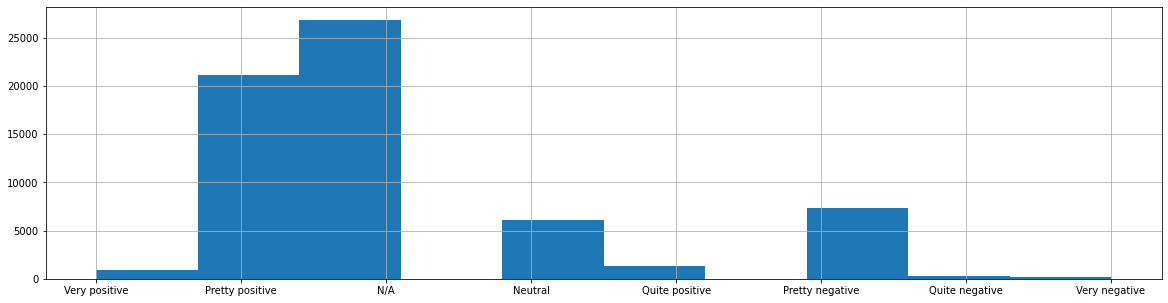

In [13]:
plt.figure(figsize=[20, 5])
profiled_text_dataframe['sentiment_polarity'].hist()

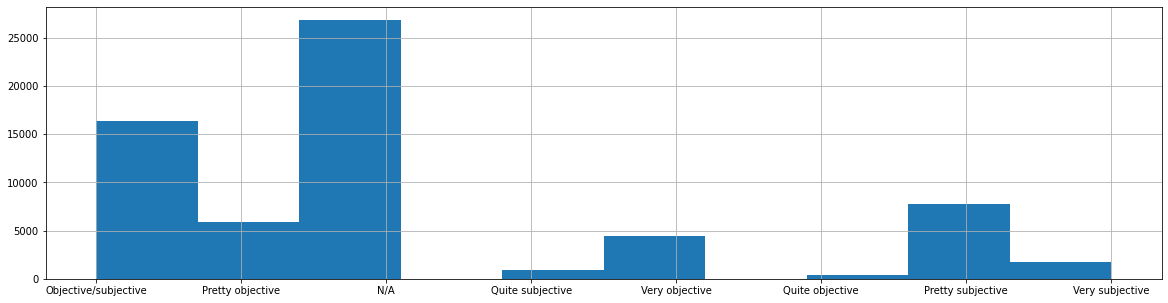

In [14]:
plt.figure(figsize=[20, 5])
profiled_text_dataframe['sentiment_subjectivity'].hist()

### Spelling quality check

#### The spelling score and spelling quality check is upto 70% accurate, it's using Peter Norvig’s “How to Write a Spelling Corrector".

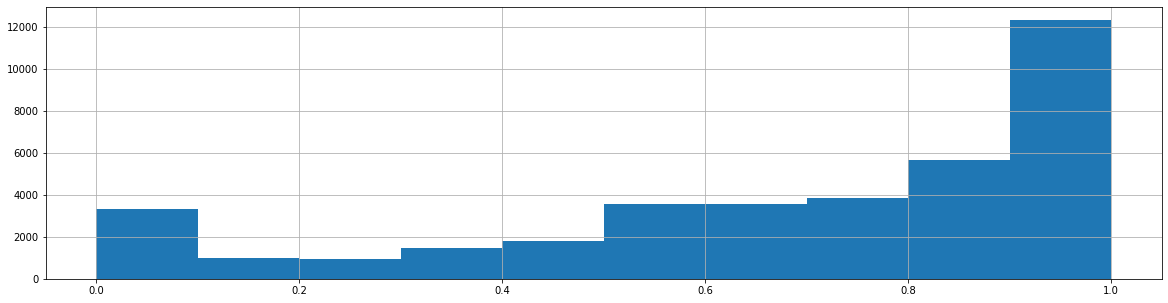

In [15]:
plt.figure(figsize=[20, 5])
profiled_text_dataframe['spelling_quality_score'].hist()

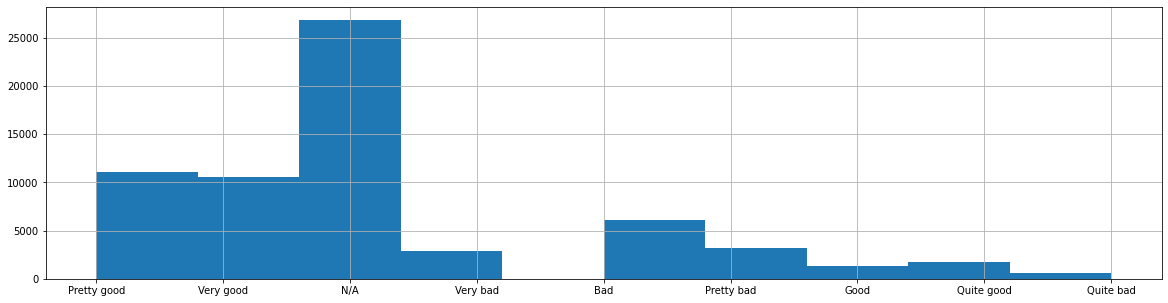

In [16]:
plt.figure(figsize=[20, 5])
profiled_text_dataframe['spelling_quality'].hist()

### Running describe() on the new NLP profiler generated dataframe

In [17]:
profiled_text_dataframe.describe()

,sentences_count,characters_count,spaces_count,words_count,duplicates_count,chars_excl_spaces_count,emoji_count,whole_numbers_count,alpha_numeric_count,non_alpha_numeric_count,punctuations_count,stop_words_count,dates_count,noun_phase_count,sentiment_polarity_score,sentiment_subjectivity_score,spelling_quality_score
count,37427.000000,37427.000000,37427.000000,37427.000000,37427.000000,37427.000000,37427.000000,37427.000000,37427.000000,37427.000000,37427.000000,37427.000000,37427.000000,37427.000000,37427.000000,37427.000000,37427.000000
mean,3.222032,113.211906,17.350603,18.459909,2.365672,95.861303,0.016566,0.386673,91.335587,21.876319,4.498624,0.831352,0.000374,10.289978,0.182171,0.492770,0.690830
std,2.635557,105.103471,16.647227,16.717686,3.105002,88.669271,0.264065,1.100954,84.361319,21.159861,5.338063,2.339644,0.020673,9.370133,0.351318,0.259904,0.311665
min,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
25%,1.000000,33.000000,5.000000,6.000000,0.000000,28.000000,0.000000,0.000000,27.000000,6.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.357143,0.500000
50%,3.000000,86.000000,13.000000,14.000000,1.000000,73.000000,0.000000,0.000000,70.000000,17.000000,3.000000,0.000000,0.000000,8.000000,0.150000,0.514286,0.777778
75%,4.000000,165.000000,25.000000,27.000000,4.000000,139.000000,0.000000,0.000000,133.000000,32.000000,6.000000,1.000000,0.000000,15.000000,0.400000,0.650000,1.000000
max,54.000000,2713.000000,344.000000,383.000000,57.000000,2369.000000,24.000000,37.000000,2169.000000,544.000000,187.000000,70.000000,2.000000,213.000000,1.000000,1.000000,1.000000


### Resources

- https://www.kaggle.com/raenish/cheatsheet-text-helper-functions
- https://textblob.readthedocs.io/en/dev/quickstart.html
- [Approaching (Almost) Any NLP Problem on Kaggle](https://www.kaggle.com/abhishek/approaching-almost-any-nlp-problem-on-kaggle)
- [Words of estimative probability](https://en.wikipedia.org/wiki/Words_of_estimative_probability)
- [NLP Profiler source file](https://github.com/neomatrix369/awesome-ai-ml-dl/blob/master/examples/better-nlp/library/org/neomatrix369/nlp_profiler.py)
- [Kaggle Utility script](https://www.kaggle.com/neomatrix369/nlp-profiler-class)
- [Kaggle kernel](https://www.kaggle.com/neomatrix369/nlp-profiler-simple-dataset)
- [Awesome AI-ML-DL: Better NLP library](https://bit.ly/better-nlp-launch)
- [Awesome AI-ML-DL: NLP Resources](https://github.com/neomatrix369/awesome-ai-ml-dl/tree/master/natural-language-processing)
- [Awesome AI-ML-DL Github](https://github.com/neomatrix369/awesome-ai-ml-dl/blob/)